<a href="https://colab.research.google.com/github/chelsea591/Machine_Learning_Qlab_PC/blob/main/PC2/PC2_Ejercicio_2.1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Parte 2: Métodos de Ensamble para Predecir Ventas y Comparación Final**



### **2.1 Preparación de Datos**


####**a) Explore la base de datos, verifique si hay valores nulos y revise los tipos de datos.**

In [3]:
# Notebook configuration
import six
import sys
from IPython.display import Image
sys.modules['sklearn.externals.six'] = six

# Basic
import pandas as pd
import numpy as np

# Plotting
import matplotlib.pyplot as plt
import seaborn as sns
import pydot
from io import StringIO
from IPython.display import Image

# Scikit-Learn
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, BaggingRegressor, RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score, confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV

# Matplotlib configuration
%matplotlib inline
plt.style.use('seaborn-v0_8-white')

In [4]:
# Definimos la función para graficar los árboles
def print_tree(estimator, features, class_names=None, filled=True):
    tree = estimator
    names = features
    color = filled
    classn = class_names
    dot_data = StringIO()
    export_graphviz(estimator, out_file=dot_data, feature_names=features, class_names=classn, filled=filled)
    graph = pydot.graph_from_dot_data(dot_data.getvalue())
    return(graph)

In [9]:
# Cargamos la base
carseats = pd.read_csv('https://raw.githubusercontent.com/qlabpucp/datasets/main/datasets/carseats.csv')

In [10]:
# Vemos que cargo bien la base y algunos encabezados.
carseats.head()

,Unnamed: 0,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [11]:
# Vemos si hay datos nulos y los tipos de datos
carseats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   400 non-null    int64  
 1   Sales        400 non-null    float64
 2   CompPrice    400 non-null    int64  
 3   Income       400 non-null    int64  
 4   Advertising  400 non-null    int64  
 5   Population   400 non-null    int64  
 6   Price        400 non-null    int64  
 7   ShelveLoc    400 non-null    object 
 8   Age          400 non-null    int64  
 9   Education    400 non-null    int64  
 10  Urban        400 non-null    object 
 11  US           400 non-null    object 
dtypes: float64(1), int64(8), object(3)
memory usage: 37.6+ KB


Se observa que no hay valores nulos, todas las colummnas poseen 400 observaciones. Los tipos de datos son numéricos en su mayoría: 1 dato float y 8 integer. Asimismo, hay tres datos tipo object.

####**b) Separe los datos en predictores (X) y la variable objetivo (y, la columna Sales).**

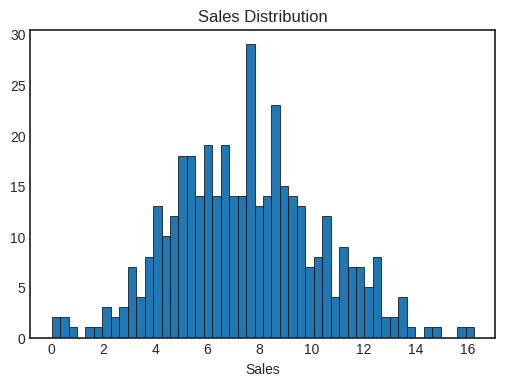

In [22]:
# Vemos la distribución de Sales para decidir aplicar el logaritmo.
X = carseats[['CompPrice', 'Income', 'Advertising', 'Population', 'Price','Age','Education','ShelveLoc','Urban', 'US']].values
y = carseats.Sales.values

# Configuración de una sola figura
plt.figure(figsize=(6, 4))

# Crear el histograma
plt.hist(y, bins=50, edgecolor='black', linewidth=0.5)
plt.xlabel('Sales')
plt.title('Sales Distribution')

plt.show()

Se observa la forma de una campana por lo que no es necesario convertirlo a logaritmo.

In [28]:
# 1. Definimos los predictores
X = carseats.drop('Sales', axis=1)

# 2. Trasformamos las palabras a número automáticamente usando dummies
X = pd.get_dummies(X, columns=['ShelveLoc', 'Urban', 'US'], drop_first=True)

# 3. Definimos 'y'
y = carseats.Sales.values



# --- Verificamos ---
print("Nuevas columnas:", X.columns.tolist())

Nuevas columnas: ['Unnamed: 0', 'CompPrice', 'Income', 'Advertising', 'Population', 'Price', 'Age', 'Education', 'ShelveLoc_Good', 'ShelveLoc_Medium', 'Urban_Yes', 'US_Yes']


####**c) Divida los datos en un conjunto de entrenamiento (80%) y un conjunto de prueba (20%), usando random_state=10.**

In [29]:
# Usamos el train_state_split para dividir los datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

### **2.2 Modelos de Ensamble: Versión Base vs. Versión Optimizada**

#### **a) Modelos Base a Criterio Propio:**

* **Entrene un ```Bagging Regressor``` usando hiperparámetros que considere razonables.**

In [37]:
bagging = BaggingRegressor(max_features=11, random_state=10)
bagging.fit(X_train, y_train)

BaggingRegressor(max_features=11, random_state=10)

Text(0, 0.5, 'y_test')

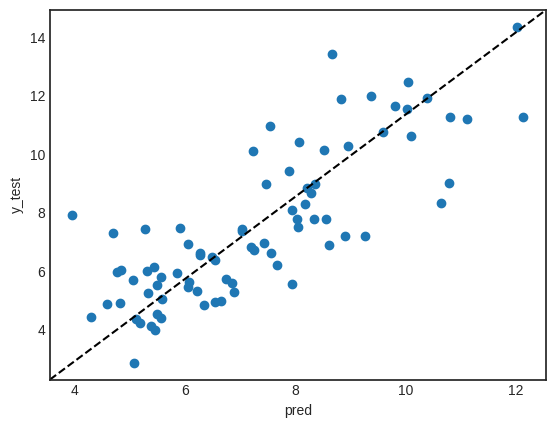

In [38]:
y_pred = bagging.predict(X_test)

plt.scatter(y_pred, y_test, label='Sales')
plt.plot([0, 1], [0, 1], '--k', transform=plt.gca().transAxes)
plt.xlabel('pred')
plt.ylabel('y_test')

In [39]:
mse_bag = round( mean_squared_error(y_test, y_pred), 3 )
r2_bag = round( r2_score(y_test, y_pred), 3 )

metrics_bag = pd.DataFrame({
    'Model': ['Bagging'],
    'Mean Squared Error (MSE)': [mse_bag],
    'R-squared (R2)': [r2_bag]
})
metrics_bag

,Model,Mean Squared Error (MSE),R-squared (R2)
0,Bagging,2.361,0.635


* **Entrene un ```Random Forest Regressor``` usando hiperparámetros que considere razonables**

In [40]:
rf = RandomForestRegressor(max_features=11, random_state=10)
rf.fit(X_train, y_train)

RandomForestRegressor(max_features=11, random_state=10)

Text(0, 0.5, 'y_test')

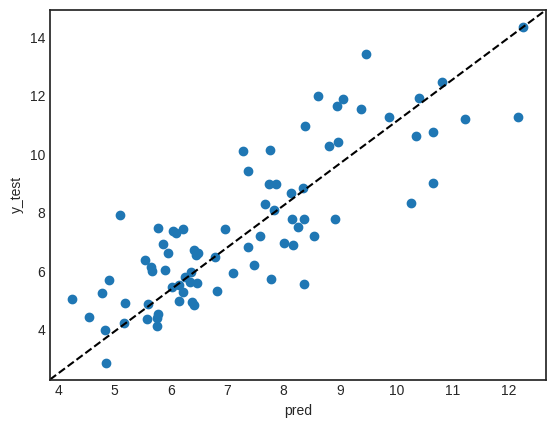

In [41]:
y_pred = rf.predict(X_test)

plt.scatter(y_pred, y_test, label='Sales')
plt.plot([0, 1], [0, 1], '--k', transform=plt.gca().transAxes)
plt.xlabel('pred')
plt.ylabel('y_test')

In [42]:
mse_rf = round( mean_squared_error(y_test, y_pred), 3 )
r2_rf = round( r2_score(y_test, y_pred), 3 )

metrics_rf = pd.DataFrame({
    'Model': ['Random Forest'],
    'Mean Squared Error (MSE)': [mse_rf],
    'R-squared (R2)': [r2_rf]
})
metrics_rf

,Model,Mean Squared Error (MSE),R-squared (R2)
0,Random Forest,2.085,0.678


* **Entrene un ```Gradient Boosting Regressor``` usando hiperparámetros que considere razonables.**

In [43]:
boost = GradientBoostingRegressor(n_estimators=500, learning_rate=0.01, random_state=10)
boost.fit(X_train, y_train)

GradientBoostingRegressor(learning_rate=0.01, n_estimators=500, random_state=10)

Text(0, 0.5, 'y_test')

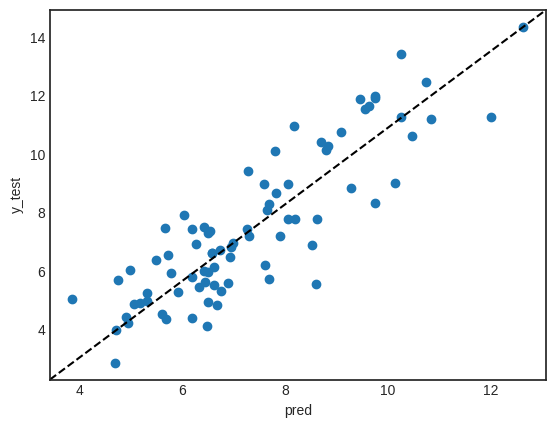

In [44]:
y_pred = boost.predict(X_test)

plt.scatter(y_pred, y_test, label='Sales')
plt.plot([0, 1], [0, 1], '--k', transform=plt.gca().transAxes)
plt.xlabel('pred')
plt.ylabel('y_test')

In [45]:
mse_boost = round( mean_squared_error(y_test, y_pred), 3 )
r2_boost = round( r2_score(y_test, y_pred), 3 )

metrics_boost = pd.DataFrame({
    'Model': ['Gradient Boosting Regressor'],
    'Mean Squared Error (MSE)': [mse_boost],
    'R-squared (R2)': [r2_boost]
})
metrics_boost

,Model,Mean Squared Error (MSE),R-squared (R2)
0,Gradient Boosting Regressor,1.782,0.725


Comparando los resultados:

In [46]:
metrics_combined = pd.concat([metrics_bag, metrics_rf, metrics_boost])
metrics_combined = metrics_combined.sort_values('R-squared (R2)', ascending=False).reset_index(drop=True)
metrics_combined

,Model,Mean Squared Error (MSE),R-squared (R2)
0,Gradient Boosting Regressor,1.782,0.725
1,Random Forest,2.085,0.678
2,Bagging,2.361,0.635


De acuerdo con la métrica solicitada (Error Cuadrático Medio - MSE), observamos la siguiente:
* El modelo que tiene mejor desempeño es el **Gradiente Boosting Regressor** ya que tiene el menor MSE (1.782), lo que indica que tiene un menor promedio de los errores en las predicciones. Además posee el mayor R-square 0.73 explicando mayor variabiblidad de las ventas.
* Respecto al modelo **Random Forest**, con un MSE de 2.085, redujo el error comparado con el modelo **Bagging** (2.361) pero obtuvo un MSE mayor que el **Gradient Bosting** perdiendo precisión.